In [9]:
import pandas as pd
import numpy as np
from scipy import stats

titanic = pd.read_csv('titanic.csv')
titanic.columns
titanic.head()
titanic = titanic.set_index(['PassengerId'])

In [10]:
def get_NAN(column):
    

    count = column.isnull().sum()
    return count

In [11]:
get_NAN(titanic['Survived'])

0

In [12]:
get_NAN(titanic['Pclass'])

0

In [13]:
get_NAN(titanic['Sex'])

0

In [14]:
get_NAN(titanic['Age'])

177

In [15]:
get_NAN(titanic['Embarked'])

2

In [16]:
survivors = titanic['Survived'].sum()

def survival(dataframe, survival_rate):
   
    by_survival = dataframe.groupby(survival_rate)
    count = by_survival['Survived'].sum()
    survived = count / survivors * 100
    print('Survival rate:', survival_rate)
    return survival_rate, count

survived = titanic['Survived'].sum()

In [18]:
total_passenger = len(titanic['Pclass'])
first_class = (titanic['Pclass'] == 1).sum()
second_class = (titanic['Pclass'] == 2).sum()
third_class = (titanic['Pclass'] == 3).sum()

first_person =  first_class / total_passenger * 100
second_person = second_class / total_passenger * 100
third_person = third_class / total_passenger * 100

In [19]:
print('First class = ', first_person, ' | Count: ', first_class)
print('Second class  = ', second_person, ' | Count: ', second_class)
print('Third class  = ', third_person, ' | Count: ', third_class)

First class =  24.242424242424242  | Count:  216
Second class  =  20.65095398428732  | Count:  184
Third class  =  55.106621773288445  | Count:  491


In [20]:
survival(titanic, 'Pclass')

Survival rate: Pclass


('Pclass',
 Pclass
 1    136
 2     87
 3    119
 Name: Survived, dtype: int64)

In [21]:
def getcount(dataframe, fctr, qty, status):
    target = dataframe[fctr].where(dataframe[fctr] == qty)
    class_count = target.where(dataframe['Survived'] == status).count()
    return class_count


In [22]:
class1_surv = getcount(titanic, 'Pclass', 1, 1)
class2_surv = getcount(titanic, 'Pclass', 2, 1)
class3_surv = getcount(titanic, 'Pclass', 3, 1)
class1_d = getcount(titanic, 'Pclass', 1, 0)
class2_d = getcount(titanic, 'Pclass', 2, 0)
class3_d = getcount(titanic, 'Pclass', 3, 0)

In [23]:

print('First class survival:', class1_surv)
print('Second class survival:', class2_surv)
print('Third class survival:', class3_surv)
print('First class death:', class1_d)
print('Second class death:', class2_d)
print('Third class death:', class3_d)

First class survival: 136
Second class survival: 87
Third class survival: 119
First class death: 80
Second class death: 97
Third class death: 372


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
def plot(survivalarray, deatharray, factor, x_ticks):
    
    abs_survival = np.array(survivalarray)
    abs_death = np.array(deatharray)
    N = len(abs_survival)
    ind = np.arange(N)
    width = 1 / N

    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

    ax1.bar(ind, abs_survival, width, label='Survival', alpha=0.8)
    ax1.bar(ind, abs_death, width, color='#d62728', label='Death', alpha=0.8, bottom=abs_survival)

    plt.sca(ax1)
    plt.xticks(ind, x_ticks)

    ax1.set_title('Absolute count ' + factor)
    ax1.set_ylabel('Count')
    ax1.legend(loc='upper left')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)

    per_survival = (abs_survival / (abs_survival + abs_death)) * 100
    per_death = (abs_death / (abs_survival + abs_death)) * 100

    ax2.bar(ind, per_survival, width, label='Survival percentage', alpha=0.8)
    ax2.bar(ind, per_death, width, color='#d62728', label='Death percentage', alpha=0.8, bottom=per_survival)

    plt.sca(ax2)
    plt.xticks(ind, x_ticks)

    ax2.set_title('Percentage ' + factor)
    ax2.set_ylabel('Percentage')

    plt.setp(plt.gca().get_xticklabels(), rotation=45)

    return plt.show()

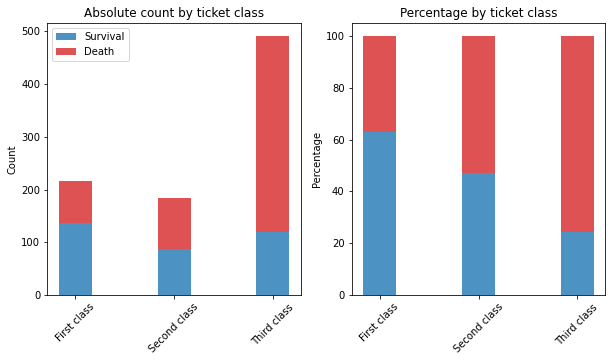

In [26]:
plot([class1_surv, class2_surv, class3_surv],
         [class1_d, class2_d, class3_d],
         'by ticket class',
         ['First class', 'Second class', 'Third class'])

In [70]:
stats.chisquare(titanic['Survived'], titanic['Pclass'])

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
5.014619883040936

In [27]:
female_survival = getcount(titanic, 'Sex', 'female', 1)
male_survival = getcount(titanic, 'Sex', 'male', 1)
female_death = getcount(titanic, 'Sex', 'female', 0)
male_death = getcount(titanic, 'Sex', 'male', 0)

In [28]:
print('SURVIVORS BY GENDER')
print('Female survived: ', female_survival)
print('Male survived: ', male_survival)
print('DEATHS BY GENDER')
print('Female died: ', female_death)
print('Male died: ', male_death)

SURVIVORS BY GENDER
Female survived:  233
Male survived:  109
DEATHS BY GENDER
Female died:  81
Male died:  468


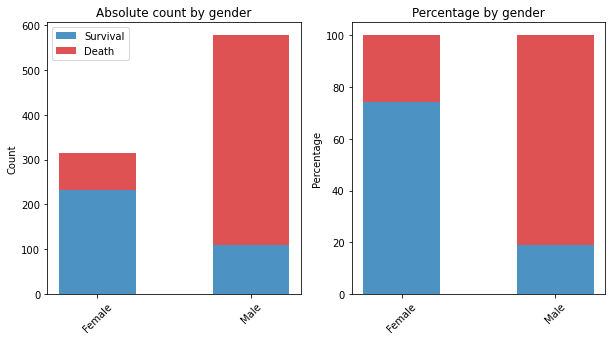

In [29]:
plot([female_survival, male_survival],
         [female_death, male_death],
         'by gender',
         ['Female', 'Male'])

In [30]:
gender_titanic = titanic[['Sex', 'Survived']]
gender_titanic.replace(['male', 'female'], [0, 1], inplace=True)

gender_titanic[['Sex', 'Survived']].corr(method='pearson')

C:\Users\17786\AppData\Local\Temp\ipykernel_13176\4052270375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gender_titanic.replace(['male', 'female'], [0, 1], inplace=True)


,Sex,Survived
Sex,1.000000,0.543351
Survived,0.543351,1.000000


In [31]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: Survived, dtype: float64

In [32]:
titanic_age = titanic[['Age' , 'Survived']].dropna(how='any')
titanic_age['Age'] = (np.floor(titanic_age['Age'])).astype(int)
titanic_age.shape

(714, 2)

In [33]:
titanic_age.head()

,Age,Survived
PassengerId,,
1,22,0
2,38,1
3,26,1
4,35,1
5,35,0


In [34]:
print('Youngest passenger: ' + str(titanic_age['Age'].min() * 12) + ' months old')
print('Oldest passenger: ' + str(titanic_age['Age'].max()) + ' years old')

Youngest passenger: 0 months old
Oldest passenger: 80 years old


In [35]:
ages = titanic_age['Age'].unique()
ages.sort()
ages

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 70,
       71, 74, 80])

In [36]:
age_survival = pd.DataFrame(index=ages, columns=['Survived', 'Deaths', 'Total', 'Percentage'])

age_survival['Survived'] = titanic_age.groupby('Age')['Survived'].sum()
age_survival['Total'] = titanic_age.groupby('Age').count()
age_survival['Deaths'] = age_survival['Total'] - age_survival['Survived']
age_survival['Percentage'] = round(titanic_age.groupby('Age')['Survived'].mean() * 100, 2)

age_survival.head()

,Survived,Deaths,Total,Percentage
0,7,0,7,100.00
1,5,2,7,71.43
2,3,7,10,30.00
3,5,1,6,83.33
4,7,3,10,70.00


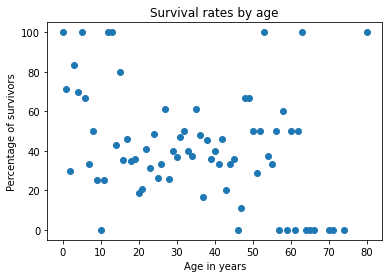

In [37]:
x = age_survival['Percentage'].index
y = age_survival['Percentage']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')
plt.show()

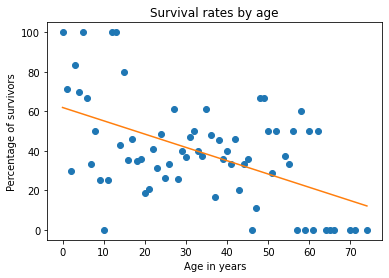

In [38]:
age_survival = age_survival.drop(age_survival[(age_survival['Percentage'] == 100) & (age_survival.index > 50)].index)
x = age_survival['Percentage'].index
y = age_survival['Percentage']
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, m*x + b, '-')
plt.title('Survival rates by age')
plt.xlabel('Age in years')
plt.ylabel('Percentage of survivors')
plt.show()

In [39]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

print('Slope: ', slope)
print('Intercept: ', intercept)
print('r_value: ', r_value)
print('r_squared: ', r_value ** 2)
print('p_value: ', p_value)
print('std_error: ', std_err)

Slope:  -0.6731448575214685
Intercept:  61.93830324815576
r_value:  -0.5279643944469163
r_squared:  0.2787464018036991
p_value:  3.7119198819981097e-06
std_error:  0.13328335798924698


C:\Users\17786\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\17786\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


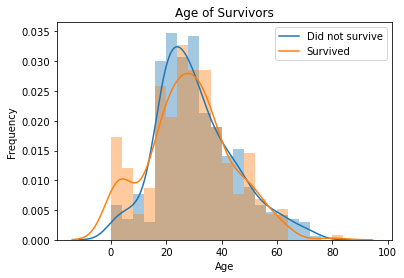

In [61]:
age_bins = np.arange(0, 100, 4)
sns.distplot(titanic.loc[(titanic['Survived']==0) & (~titanic['Age'].isnull()),'Age'], bins=age_bins)
sns.distplot(titanic.loc[(titanic['Survived']==1) & (~titanic['Age'].isnull()),'Age'], bins=age_bins)
plt.title('Age of Survivors')
plt.ylabel('Frequency')
plt.legend(['Did not survive', 'Survived'])
plt.show()

In [41]:
def get_age(age):
   
    younger = titanic['Age'].where(titanic['Age'] <= age)
    older = titanic['Age'].where(titanic['Age'] > age)
    younger_survival = younger.where(titanic['Survived'] == 1).count()
    older_survival = older.where(titanic['Survived'] == 1).count()
    younger_death = younger.where(titanic['Survived'] == 0).count()
    older_death = older.where(titanic['Survived'] == 0).count()
    return younger_survival, older_survival, younger_death, older_death

In [42]:
up_6_survival, over_6_survival, up_6_death, over_6_death = get_age(6)
up_12_survival, over_12_survival, up_12_death, over_12_death = get_age(12)

print('AGE LIMIT = 6')
print('Survivors for children up to 6: ', up_6_survival)
print('Survivor for people over 6: ', over_6_survival)
print('Deaths for children up to 6: ', up_6_death)
print('Deaths for people over 6: ', over_6_death)

print('AGE LIMIT = 12')
print('Survivors for children up to 12: ', up_12_survival)
print('Survivors for people over 12: ', over_12_survival)
print('Deaths for children up to 12: ', up_12_death)
print('Deaths for people over 12: ', over_12_death)

AGE LIMIT = 6
Survivors for children up to 6:  33
Survivor for people over 6:  257
Deaths for children up to 6:  14
Deaths for people over 6:  410
AGE LIMIT = 12
Survivors for children up to 12:  40
Survivors for people over 12:  250
Deaths for children up to 12:  29
Deaths for people over 12:  395


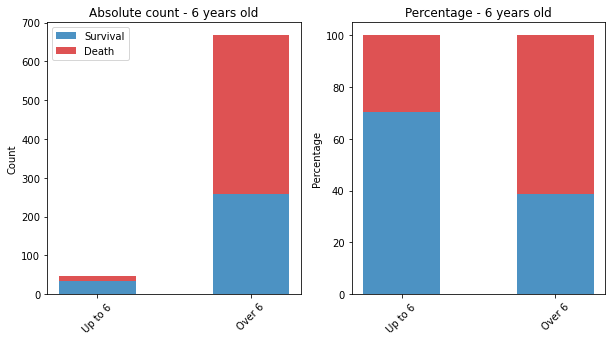

In [43]:
plot([up_6_survival, over_6_survival],
         [up_6_death, over_6_death],
         '- 6 years old',
         ['Up to 6', 'Over 6'])

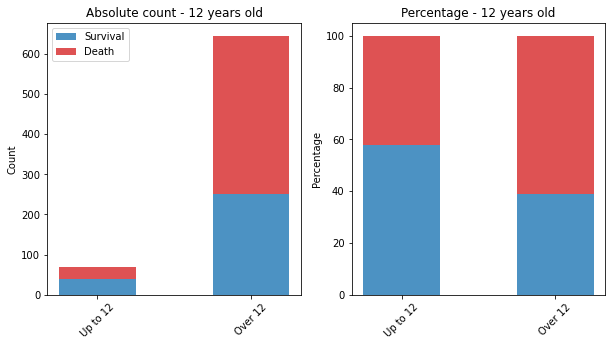

In [45]:
plot([up_12_survival, over_12_survival],
         [up_12_death, over_12_death],
         '- 12 years old',
         ['Up to 12', 'Over 12'])

In [46]:
total_passenger = len(titanic['Embarked'])
cherbourg = (titanic['Embarked'] == 'C').sum()
queenstown = (titanic['Embarked'] == 'Q').sum()
southampton = (titanic['Embarked'] == 'S').sum()

per_cherbourg =  cherbourg / total_passenger * 100
per_queenstown = queenstown / total_passenger * 100
per_southampton = southampton / total_passenger * 100

In [47]:
print('Cherbourg percentage = ', per_cherbourg, '  Count: ', cherbourg)
print('Queenstown percentage = ', per_queenstown, ' Count: ', queenstown)
print('Southampton percentage = ', per_southampton, ' Count: ', southampton)

Cherbourg percentage =  18.855218855218855   Count:  168
Queenstown percentage =  8.641975308641975  Count:  77
Southampton percentage =  72.27833894500561  Count:  644


In [48]:
survival(titanic, 'Embarked')

Survival rate: Embarked


('Embarked',
 Embarked
 C     93
 Q     30
 S    217
 Name: Survived, dtype: int64)

In [49]:
cherbourg_survivors = getcount(titanic, 'Embarked', 'C', 1)
queenstown_survivors = getcount(titanic, 'Embarked', 'Q', 1)
southampton_survivors = getcount(titanic, 'Embarked', 'S', 1)
cherbourg_death = getcount(titanic, 'Embarked', 'C', 0)
queenstown_death = getcount(titanic, 'Embarked', 'Q', 0)
southampton_death = getcount(titanic, 'Embarked', 'S', 0)

In [50]:
print('SURVIVORS BY PORT OF EMBARKATION')
print('Cherbourg survivors:', cherbourg_survivors)
print('Queenstown class survivors:', queenstown_survivors)
print('Southampton survivors:', southampton_survivors)
print('DEATHS BY PORT OF EMBARKATION')
print('Cherbourg death:', cherbourg_death)
print('Queenstown death:', queenstown_death)
print('Southampton death:', southampton_death)

SURVIVORS BY PORT OF EMBARKATION
Cherbourg survivors: 93
Queenstown class survivors: 30
Southampton survivors: 217
DEATHS BY PORT OF EMBARKATION
Cherbourg death: 75
Queenstown death: 47
Southampton death: 427


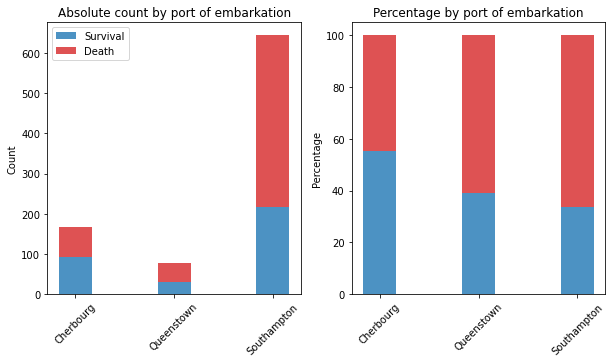

In [51]:
plot([cherbourg_survivors, queenstown_survivors, southampton_survivors],
         [cherbourg_death, queenstown_death, southampton_death],
         'by port of embarkation',
         ['Cherbourg', 'Queenstown', 'Southampton'])

In [56]:
cherbourg_count = titanic[titanic['Embarked'] == 'C']

cherbourg_first = (cherbourg_count['Pclass'] == 1).sum()
cherbourg_second = (cherbourg_count['Pclass'] == 2).sum()
cherbourg_third = (cherbourg_count['Pclass'] == 3).sum()

cherbourg_f = cherbourg_first / cherbourg * 100
cherbourg_s = cherbourg_second / cherbourg * 100
cherbourg_t = cherbourg_third / cherbourg * 100


In [58]:
southampton_count = titanic[titanic['Embarked'] == 'S']

southampton_first = (southampton_count['Pclass'] == 1).sum()
southampton_second = (southampton_count['Pclass'] == 2).sum()
southampton_third = (southampton_count['Pclass'] == 3).sum()

southampton_f = southampton_first / southampton * 100
southampton_s = southampton_second / southampton * 100
southampton_t = southampton_third / southampton * 100

In [59]:
print('Cherbourg first class = ', cherbourg_f)
print('Cherbourg second class = ', cherbourg_s)
print('Cherbourg third class percentage = ', cherbourg_t)

print('Southampton first class = ', southampton_f)
print('Southampton second class = ', southampton_s)
print('Southampton third class percentage = ', southampton_t)

Cherbourg first class =  50.595238095238095
Cherbourg second class =  10.119047619047619
Cherbourg third class percentage =  39.285714285714285
Southampton first class =  19.72049689440994
Southampton second class =  25.465838509316768
Southampton third class percentage =  54.81366459627329


In [60]:
titanic.groupby(['Sex', 'Pclass', 'Embarked'])['Survived'].mean() * 100

Sex     Pclass  Embarked
female  1       C            97.674419
                Q           100.000000
                S            95.833333
        2       C           100.000000
                Q           100.000000
                S            91.044776
        3       C            65.217391
                Q            72.727273
                S            37.500000
male    1       C            40.476190
                Q             0.000000
                S            35.443038
        2       C            20.000000
                Q             0.000000
                S            15.463918
        3       C            23.255814
                Q             7.692308
                S            12.830189
Name: Survived, dtype: float64